In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import statsmodels.formula.api as smf
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
warnings.simplefilter(action='ignore')

In [2]:
path = '/content/drive/MyDrive/01 Data Science with Python ML deep learning/Project /P 02 : Electrical Data Linear_Lasso_Ridge_ElasticNet/ELE - ELE.csv'
df = pd.read_csv(path)

Step No 01 : Undurstand the Business Problem
----
- In the electrical system or utility power factor is very importance to save electrical energy.
- In this dataset we will take and study only relation between Power and Power Factor.
- From the Active, Apparant and Reactive Power we try to calculate Power Factor

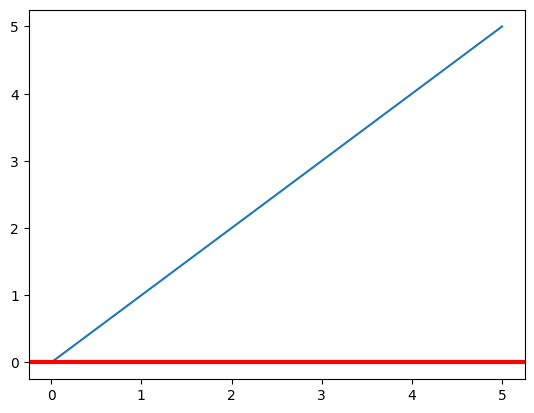

In [3]:
x=[0,1,2,3,4,5]
plt.plot(x)

y=[0,0,0,0,0,0]
plt.plot(y)

plt.axhline(y=0,color="r",linewidth=3)



In [4]:
df.columns

Index(['Date', 'Etime', 'Status', 'Freq_Avg[Hz]', 'U1_Avg[V]', 'Ufnd1_Avg[V]',
       'Udeg1_Avg[deg]', 'U2_Avg[V]', 'Ufnd2_Avg[V]', 'Udeg2_Avg[deg]',
       ...
       'WP+dem[Wh]', 'WP-dem[Wh]', 'WQLAGdem[varh]', 'WQLEADdem[varh]',
       'Pdem+[W]', 'Pdem-[W]', 'QdemLAG[var]', 'QdemLEAD[var]', 'PFdem',
       'Pulse'],
      dtype='object', length=135)

In [36]:
df = df[['P_Avg[W]','S_Avg[VA]','Q_Avg[var]','PF_Avg','Freq_Avg[Hz]','U1_Avg[V]']]
df.head(5)

,P_Avg[W],S_Avg[VA],Q_Avg[var],PF_Avg,Freq_Avg[Hz],U1_Avg[V]
1,5810000.0,8600000.0,6340000.0,0.676,50.0,23200.0
2,5880000.0,8700000.0,6410000.0,0.676,50.1,23200.0
3,5890000.0,8720000.0,6430000.0,0.676,50.1,23200.0
4,5860000.0,8680000.0,6400000.0,0.675,50.1,23200.0
5,5720000.0,8470000.0,6250000.0,0.675,50.0,23200.0


Step No 02 : Undurstanding the Data
----
1. Active Power - This is the actual power require to the system work. base on this power most of the electrical equipments are working.
2. Reactive Power - The role of this power and importance of this power is very less as compare to Active power.
3. Apparant Power - addition of Active and Reactive Power
4. Power Factor - Relation between Active and reactive power , PF=1 means reactive power consumption is less and Active power is equal to apparent power

Step No 03 : Data PreProcessing
---
- Data Cleaning
- Data Wrangling
- Featurs Selection
- Data Visualisation

In [6]:
df.isnull().sum()

P_Avg[W]        2
S_Avg[VA]       2
Q_Avg[var]      2
PF_Avg          2
Freq_Avg[Hz]    2
U1_Avg[V]       2
dtype: int64

In [7]:
df.dropna(axis=0, inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2678 entries, 1 to 2678
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   P_Avg[W]      2678 non-null   float64
 1   S_Avg[VA]     2678 non-null   float64
 2   Q_Avg[var]    2678 non-null   float64
 3   PF_Avg        2678 non-null   float64
 4   Freq_Avg[Hz]  2678 non-null   float64
 5   U1_Avg[V]     2678 non-null   float64
dtypes: float64(6)
memory usage: 146.5 KB


In [9]:
df.describe()

,P_Avg[W],S_Avg[VA],Q_Avg[var],PF_Avg,Freq_Avg[Hz],U1_Avg[V]
count,2.678000e+03,2.678000e+03,2.678000e+03,2678.000000,2678.000000,2678.000000
mean,5.800258e+06,8.614033e+06,3.381146e+06,0.249290,49.987192,23046.751307
std,1.447829e+06,2.118282e+06,5.355190e+06,0.624153,0.058017,299.736366
min,1.320000e+06,2.440000e+06,-6.790000e+06,-0.681000,49.800000,22400.000000
25%,5.050000e+06,7.480000e+06,-3.357500e+06,-0.665000,50.000000,22800.000000
50%,5.940000e+06,8.790000e+06,6.350000e+06,0.674000,50.000000,23000.000000
75%,6.990000e+06,1.040000e+07,7.630000e+06,0.676000,50.000000,23300.000000
max,8.390000e+06,1.250000e+07,9.250000e+06,0.681000,50.200000,23900.000000


In [10]:
df.corr()

,P_Avg[W],S_Avg[VA],Q_Avg[var],PF_Avg,Freq_Avg[Hz],U1_Avg[V]
P_Avg[W],1.000000,0.999325,0.803785,0.772185,0.017552,-0.281369
S_Avg[VA],0.999325,1.000000,0.808720,0.774546,0.016150,-0.277236
Q_Avg[var],0.803785,0.808720,1.000000,0.953852,0.006046,-0.261214
PF_Avg,0.772185,0.774546,0.953852,1.000000,0.006293,-0.227458
Freq_Avg[Hz],0.017552,0.016150,0.006046,0.006293,1.000000,0.092016
U1_Avg[V],-0.281369,-0.277236,-0.261214,-0.227458,0.092016,1.000000


<Axes: >

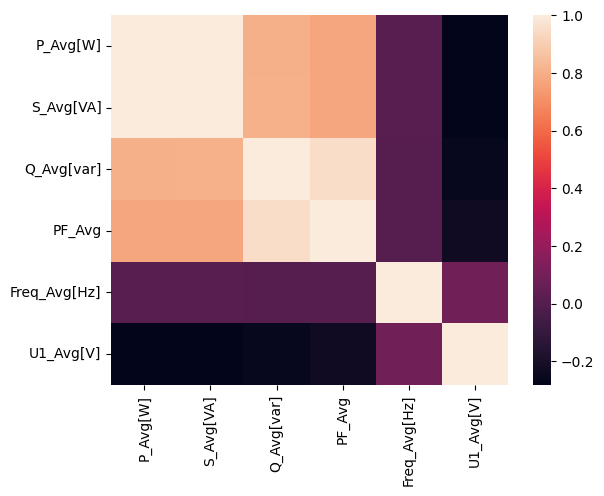

In [11]:
sns.heatmap(df.corr())

<Figure size 200x200 with 0 Axes>

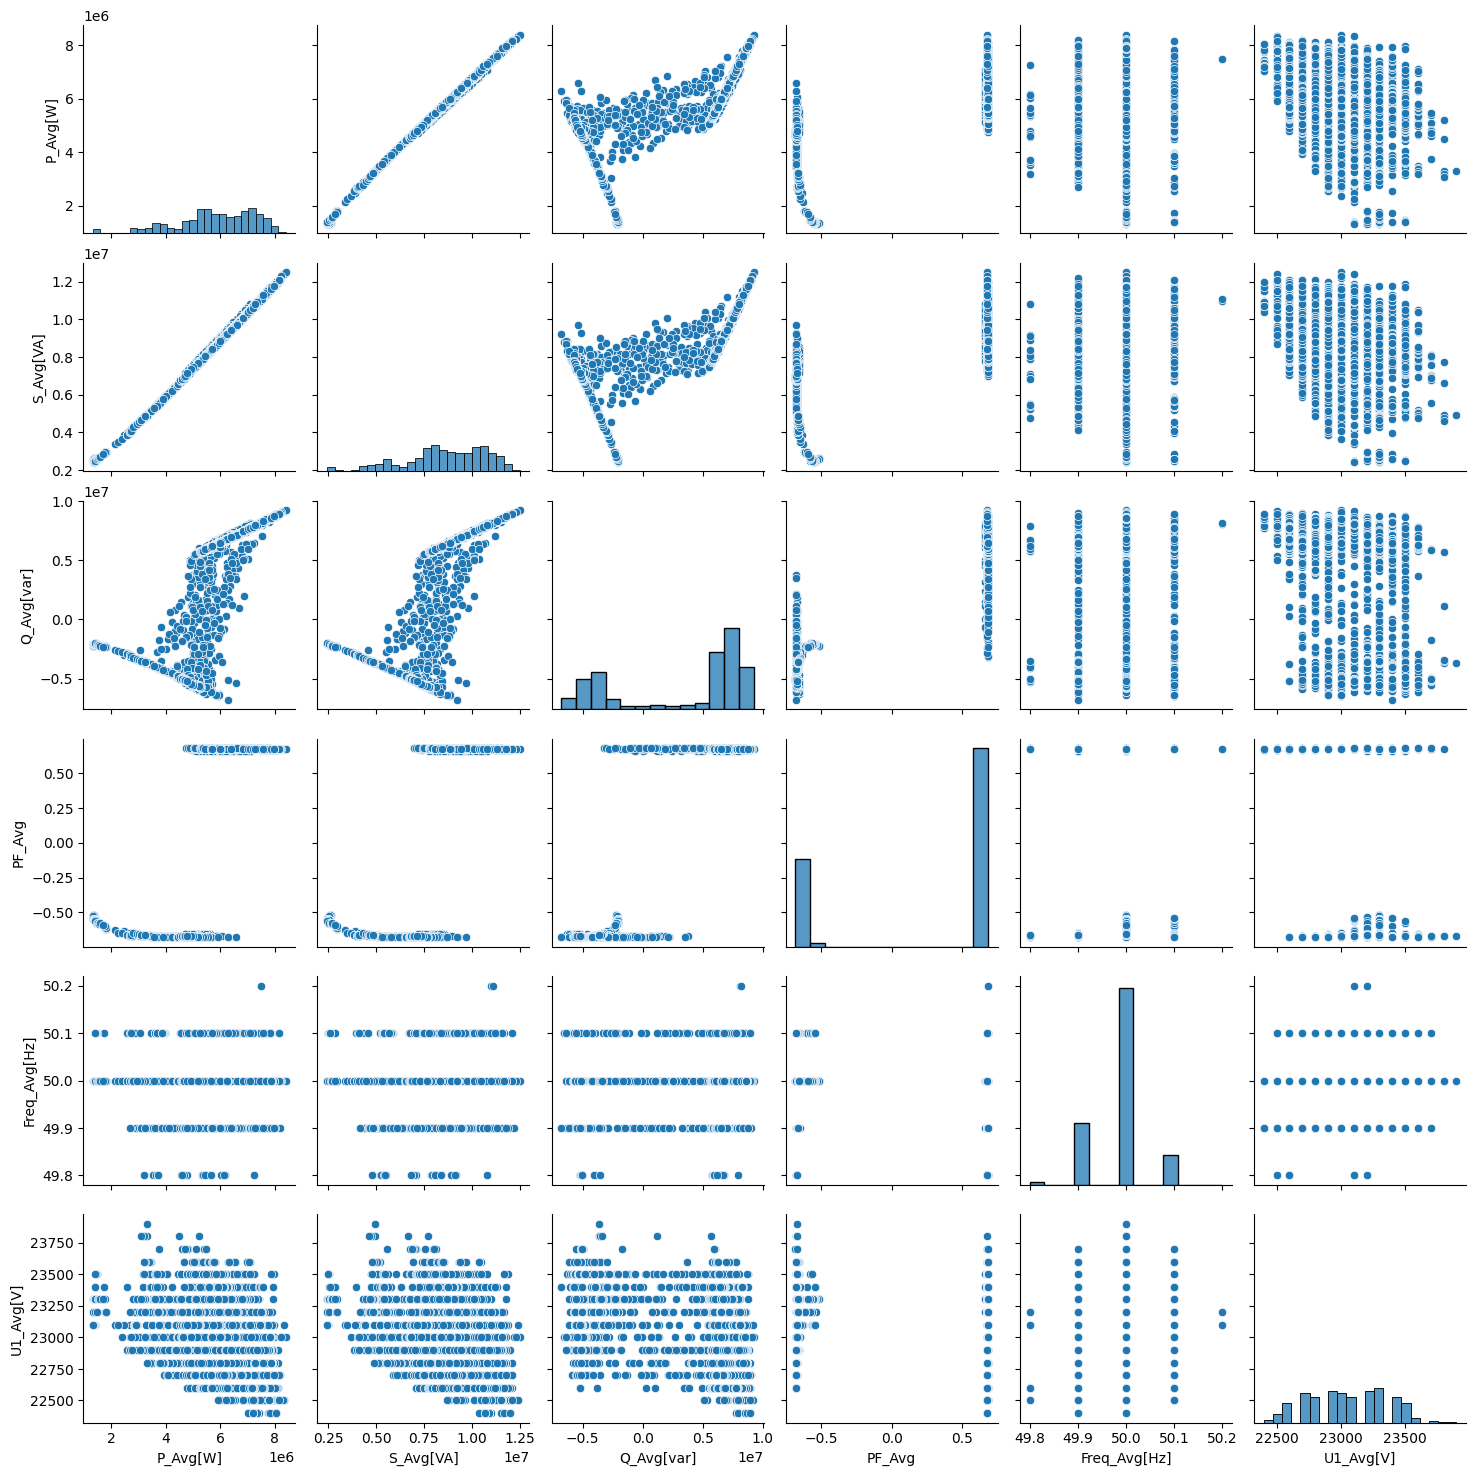

In [12]:
plt.figure(figsize=(2,2))
sns.pairplot(data=df)
plt.show()

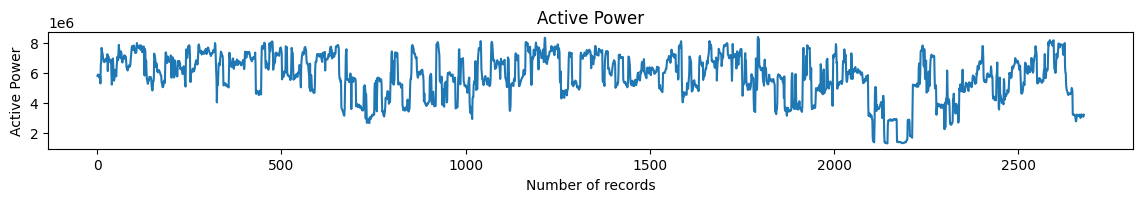

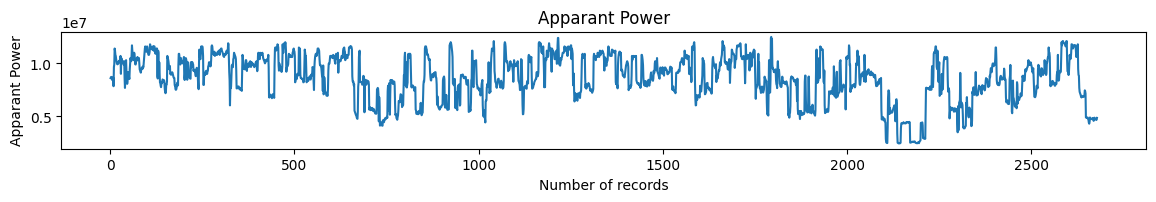

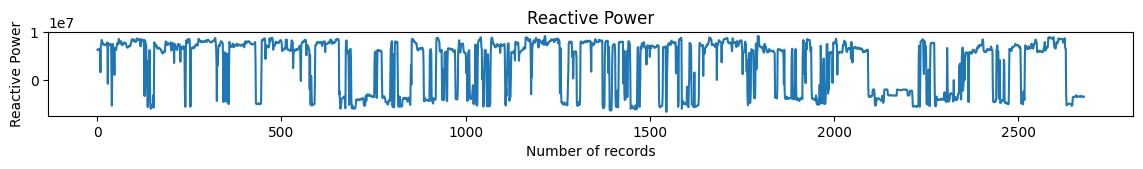

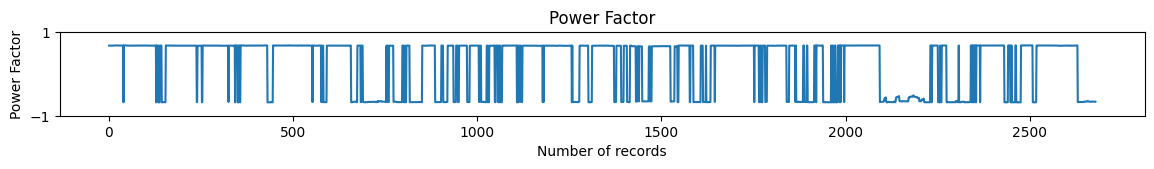

In [13]:
plt.figure(figsize=(14,7))
plt.subplot(4,1,1)
plt.plot(df['P_Avg[W]'])
plt.title("Active Power")
plt.xlabel("Number of records")
plt.ylabel("Active Power")
plt.show()

plt.figure(figsize=(14,7))
plt.subplot(4,1,2)
plt.plot(df['S_Avg[VA]'])
plt.title("Apparant Power")
plt.xlabel("Number of records")
plt.ylabel("Apparant Power")
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(4,1,3)
plt.plot(df['Q_Avg[var]'])
plt.title("Reactive Power")
plt.xlabel("Number of records")
plt.ylabel("Reactive Power")
plt.show()

plt.figure(figsize=(14,5))
plt.subplot(4,1,4)
plt.plot(df['PF_Avg'])
plt.title("Power Factor")
plt.xlabel("Number of records")
plt.ylabel("Power Factor")
plt.yticks([-1,1])
plt.show()

In [14]:
df['PF_Avg'].mean()

0.24928976848394327

Step No 4/5 :  Modelling and Evolution
---
1. Multi Linear Regression

In [15]:
X=df.drop('PF_Avg', axis=1)
y=df['PF_Avg']

In [16]:
X

,P_Avg[W],S_Avg[VA],Q_Avg[var],Freq_Avg[Hz],U1_Avg[V]
1,5810000.0,8600000.0,6340000.0,50.0,23200.0
2,5880000.0,8700000.0,6410000.0,50.1,23200.0
3,5890000.0,8720000.0,6430000.0,50.1,23200.0
4,5860000.0,8680000.0,6400000.0,50.1,23200.0
5,5720000.0,8470000.0,6250000.0,50.0,23200.0
...,...,...,...,...,...
2674,3180000.0,4780000.0,-3560000.0,49.8,23200.0
2675,3160000.0,4750000.0,-3550000.0,49.9,23200.0
2676,3090000.0,4650000.0,-3480000.0,49.9,23200.0
2677,3100000.0,4680000.0,-3510000.0,49.9,23200.0


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=6)

In [18]:
#Modelling
model = LinearRegression()
model.fit(X_train,y_train)

# Model Intercept and Coeficient Value
print("Coeficient : ",model.coef_)
print("Intrcept : ", model.intercept_)
#Prediction
ypred_train = model.predict(X_train)
ypred_test = model.predict(X_test)

#Evolution
MAE = mean_absolute_error(y_test,ypred_test)
MSE = mean_squared_error(y_test,ypred_test)
RMSE = MSE**2
print("MAE : ", MAE)
print("MSE : ", MSE)
print("RMSE : ", RMSE)

#Accuracy
train_accuracy = model.score(X_train,ypred_train)
test_accuracy = model.score(X_test, ypred_test)
print("train_accuracy : ",train_accuracy)
print("test_accuracy : ",test_accuracy)

#Validation score
test_validation_score = cross_val_score(model, X=X_test, y=ypred_test, cv=5).mean()
train_validation_score = cross_val_score(model, X=X_train,y=ypred_train,cv=5).mean()
print("test_validation_score : ",test_validation_score)
print('train_validation_score : ',train_validation_score)

Coeficient :  [ 8.39724809e-07 -5.74943298e-07  1.13572989e-07 -5.64363225e-02
  8.97039973e-05]
Intrcept :  0.7059144353984433
MAE :  0.1151634123777316
MSE :  0.034183324808748757
RMSE :  0.0011684996949804182
train_accuracy :  1.0
test_accuracy :  1.0
test_validation_score :  1.0
train_validation_score :  1.0


Condition No 01
- Test Accuracy == Trian accuracy_score

Condition No 02
- Test Accuracy == Cross Validation Score

Condition No 03
- Test Accuracy should satisfy the Business Problem

Condition No 04 :

**For Linear Regression Only**
- Check Linearity of Error
- Check Normality of Error
- Check Equal variace of error
- Check Variable Significance

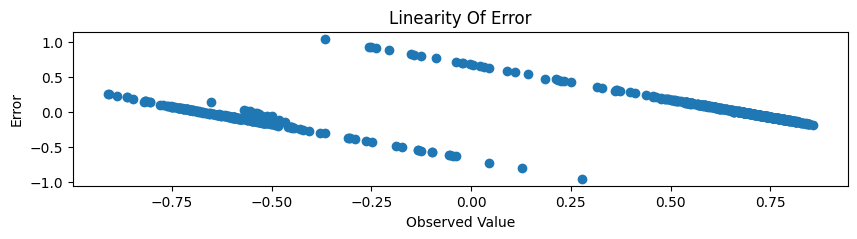

In [19]:
#Check Linearity of Error
plt.figure(figsize=(10,2))
error = y_test-ypred_test
plt.scatter(ypred_test,error)
plt.xlabel("Observed Value")
plt.ylabel("Error")
plt.title("Linearity Of Error")
plt.show()

Normality can be check with skewness of data :  1.3676720186311713
----------------------------------------------------------------------------------------------------


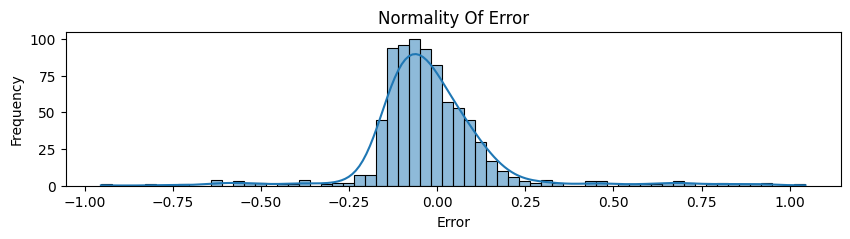

In [20]:
#Check Normality of Error
print("Normality can be check with skewness of data : ",error.skew())
print("-"*100)
plt.figure(figsize=(10,2))
sns.histplot(error, kde=True)
plt.xlabel("Error")
plt.ylabel("Frequency")
plt.title("Normality Of Error")
plt.show()

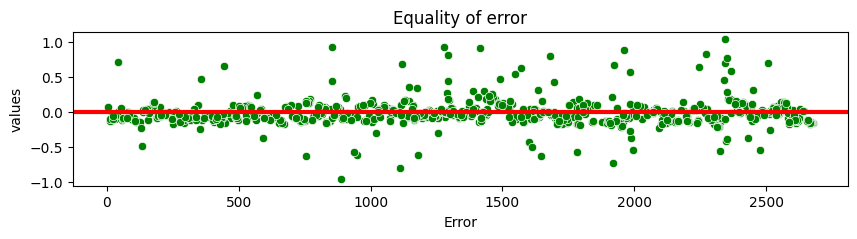

In [21]:
# Check Equal Variance Of Error
plt.figure(figsize=(10,2))
sns.scatterplot(error,color='g')
plt.axhline(y=0,color="r",linewidth=3)
plt.xlabel("Error")
plt.ylabel("values")
plt.title("Equality of error")
plt.show()

In [22]:
#Check Variable Significance
model01 = smf.ols('y~X',data=df).fit()
model01.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.915
Method:                 Least Squares   F-statistic:                     5760.
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        05:47:23   Log-Likelihood:                 765.17
No. Observations:                2678   AIC:                            -1518.
Df Residuals:                    2672   BIC:                            -1483.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.2091      3.034      0.398      0.690      -4.741       7.159
X[0]        8.296e-07   6.83e-08     12.148      0.000    6.96e-07    9.64e-07
X[1]       -5.678e-07   4.72e-08    -12.040      0.000    -6.6e-07   -4.75e-07
X[2]        1.136e-07   1.15e-09     99.136      0.000    1.11e-07    1.16e-07
X[3]          -0.0588      0.061     -0.963      0.336      -0.178       0.061
X[4]        7.259e-05   1.24e-05      5.838      0.000    4.82e-05     9.7e-05
==============================================================================
Omnibus:                     1081.759   Durbin-Watson:                   1.517
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            11409.029
Skew:                           1.613   Prob(JB):                         0.00
Kurtosis:                      12.583   Cond. No.                     1.01e+10
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.01e+10. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

_____________
______________
__________________
_______________
_________________

Linear Regression Regularization Method
---
_____
Regularization
- Lasso
-  Redge
- Elestic net

#1. Regularization L1 : Lasso
---



In [23]:
from sklearn.linear_model import Lasso
la_model = Lasso()
la_model.fit(X_train, y_train)

# Coeficient and Intercept
print("Coeficirnts : ", la_model.coef_)
print("Intercept : ", la_model.intercept_)

#Prediction
ytrain_la = la_model.predict(X_train)
ytest_la = la_model.predict(X_test)

#Evolution
la_train_accuracy = la_model.score(X_train,ytrain_la)
la_test_accuracy = la_model.score(X_test,ytest_la)
print("la_train_accuracy : ",la_train_accuracy)
print("la_test_accuracy : ",la_test_accuracy)
#Cross validation
la_cross_validation = cross_val_score(la_model,X = X_test,y = ytest_la, cv=5).mean()
print('la_cross_validation : ',la_cross_validation)

Coeficirnts :  [ 6.01782811e-07 -4.11250806e-07  1.12650575e-07 -0.00000000e+00
  6.99542569e-05]
Intercept :  -1.686620289488559
la_train_accuracy :  1.0
la_test_accuracy :  1.0
la_cross_validation :  0.999685612040088


In [24]:
# hyper parameter tunning

from sklearn.model_selection import GridSearchCV
estimator = Lasso()
param_grid ={'alpha': list(range(1,100))}
#Modeling
model_gla = GridSearchCV(estimator, param_grid,cv=5, scoring='r2')
model_gla.fit(X_train,y_train)
print(model_gla.estimator)
print(model_gla.param_grid)
print("best param : ", model_gla.best_params_)
print("best estimator : ", model_gla.best_estimator_)

Lasso()
{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]}
best param :  {'alpha': 1}
best estimator :  Lasso(alpha=1)


In [25]:
#rebuil the model with best alpha value
la_model01 = Lasso(alpha=1)
la_model01.fit(X_train, y_train)

# Coeficient and Intercept
print("Coeficirnts : ", la_model01.coef_)
print("Intercept : ", la_model01.intercept_)

#Prediction
ytrain_la01 = la_model01.predict(X_train)
ytest_la01 = la_model01.predict(X_test)

#Evolution
la_train_accuracy01 = la_model01.score(X_train,ytrain_la01)
la_test_accuracy01 = la_model01.score(X_test,ytest_la01)
print("la_train_accuracy : ",la_train_accuracy01)
print("la_test_accuracy : ",la_test_accuracy01)
#Cross validation
la_cross_validation = cross_val_score(la_model01,X = X_test,y = ytest_la01, cv=5).mean()
print('la_cross_validation : ',la_cross_validation)


Coeficirnts :  [ 6.01782811e-07 -4.11250806e-07  1.12650575e-07 -0.00000000e+00
  6.99542569e-05]
Intercept :  -1.686620289488559
la_train_accuracy :  1.0
la_test_accuracy :  1.0
la_cross_validation :  0.999685612040088


In [26]:
#Final Model ---> base on lasso regression coeficient featurs selection
#rebuil the model with best alpha value
la_model0 = Lasso(alpha=1)
la_model0.fit(X_train, y_train)

# Coeficient and Intercept
print("Coeficirnts : ", la_model0.coef_)
print("Intercept : ", la_model0.intercept_)

#Prediction
ytrain_la0 = la_model0.predict(X_train)
ytest_la0 = la_model0.predict(X_test)

#Evolution
la_train_accuracy0 = la_model0.score(X_train,ytrain_la0)
la_test_accuracy0 = la_model0.score(X_test,ytest_la0)
print("la_train_accuracy : ",la_train_accuracy0)
print("la_test_accuracy : ",la_test_accuracy0)
#Cross validation
la_cross_validation = cross_val_score(la_model0,X = X_test,y = ytest_la0, cv=5).mean()
print('la_cross_validation : ',la_cross_validation)

Coeficirnts :  [ 6.01782811e-07 -4.11250806e-07  1.12650575e-07 -0.00000000e+00
  6.99542569e-05]
Intercept :  -1.686620289488559
la_train_accuracy :  1.0
la_test_accuracy :  1.0
la_cross_validation :  0.999685612040088


#2. Regularization L2 : Ridge
---


In [27]:
from sklearn.linear_model import Ridge
la_model = Ridge()
la_model.fit(X_train, y_train)

# Coeficient and Intercept
print("Coeficirnts : ", la_model.coef_)
print("Intercept : ", la_model.intercept_)

#Prediction
ytrain_la = la_model.predict(X_train)
ytest_la = la_model.predict(X_test)

#Evolution
la_train_accuracy = la_model.score(X_train,ytrain_la)
la_test_accuracy = la_model.score(X_test,ytest_la)
print("la_train_accuracy : ",la_train_accuracy)
print("la_test_accuracy : ",la_test_accuracy)
#Cross validation
la_cross_validation = cross_val_score(la_model,X = X_test,y = ytest_la, cv=5).mean()
print('la_cross_validation : ',la_cross_validation)

Coeficirnts :  [ 8.39321904e-07 -5.74673678e-07  1.13571829e-07 -4.86428720e-02
  8.95536573e-05]
Intercept :  0.3198258539932687
la_train_accuracy :  1.0
la_test_accuracy :  1.0
la_cross_validation :  0.9999977319155873


In [28]:
# hyper parameter tunning

from sklearn.model_selection import GridSearchCV
estimator = Ridge()
param_grid ={'alpha': list(range(1,10))}
#Modeling
model_gla = GridSearchCV(estimator, param_grid,cv=5, scoring='r2')
model_gla.fit(X_train,y_train)
print(model_gla.estimator)
print(model_gla.param_grid)
print("best param : ", model_gla.best_params_)
print("best estimator : ", model_gla.best_estimator_)

Ridge()
{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9]}
best param :  {'alpha': 9}
best estimator :  Ridge(alpha=9)


In [29]:
#rebuil the model with best alpha value
la_model01 = Ridge(alpha=9)
la_model01.fit(X_train, y_train)

# Coeficient and Intercept
print("Coeficirnts : ", la_model01.coef_)
print("Intercept : ", la_model01.intercept_)

#Prediction
ytrain_la01 = la_model01.predict(X_train)
ytest_la01 = la_model01.predict(X_test)

#Evolution
la_train_accuracy01 = la_model01.score(X_train,ytrain_la01)
la_test_accuracy01 = la_model01.score(X_test,ytest_la01)
print("la_train_accuracy : ",la_train_accuracy01)
print("la_test_accuracy : ",la_test_accuracy01)
#Cross validation
la_cross_validation = cross_val_score(la_model01,X = X_test,y = ytest_la01, cv=5).mean()
print('la_cross_validation : ',la_cross_validation)


Coeficirnts :  [ 8.38001960e-07 -5.73790386e-07  1.13568030e-07 -2.31110793e-02
  8.90611322e-05]
Intercept :  -0.9450225085230787
la_train_accuracy :  1.0
la_test_accuracy :  1.0
la_cross_validation :  0.9999967602434257


In [30]:
#Final Model
#rebuil the model with best alpha value
la_model0 = Ridge(alpha=1)
la_model0.fit(X_train, y_train)

# Coeficient and Intercept
print("Coeficirnts : ", la_model0.coef_)
print("Intercept : ", la_model0.intercept_)

#Prediction
ytrain_la0 = la_model0.predict(X_train)
ytest_la0 = la_model0.predict(X_test)

#Evolution
la_train_accuracy0 = la_model0.score(X_train,ytrain_la0)
la_test_accuracy0 = la_model0.score(X_test,ytest_la0)
print("la_train_accuracy : ",la_train_accuracy0)
print("la_test_accuracy : ",la_test_accuracy0)
#Cross validation
la_cross_validation = cross_val_score(la_model0,X = X_test,y = ytest_la0, cv=5).mean()
print('la_cross_validation : ',la_cross_validation)

Coeficirnts :  [ 8.39321904e-07 -5.74673678e-07  1.13571829e-07 -4.86428720e-02
  8.95536573e-05]
Intercept :  0.3198258539932687
la_train_accuracy :  1.0
la_test_accuracy :  1.0
la_cross_validation :  0.9999977319155873


#3. Regularization L1 & L2 :ElasticNet
-----


In [31]:
from sklearn.linear_model import ElasticNet
la_model = ElasticNet()
la_model.fit(X_train, y_train)

# Coeficient and Intercept
print("Coeficirnts : ", la_model.coef_)
print("Intercept : ", la_model.intercept_)

#Prediction
ytrain_la = la_model.predict(X_train)
ytest_la = la_model.predict(X_test)

#Evolution
la_train_accuracy = la_model.score(X_train,ytrain_la)
la_test_accuracy = la_model.score(X_test,ytest_la)
print("la_train_accuracy : ",la_train_accuracy)
print("la_test_accuracy : ",la_test_accuracy)
#Cross validation
la_cross_validation = cross_val_score(la_model,X = X_test,y = ytest_la, cv=5).mean()
print('la_cross_validation : ',la_cross_validation)

Coeficirnts :  [ 6.05841768e-07 -4.13867614e-07  1.12695955e-07 -0.00000000e+00
  7.61231570e-05]
Intercept :  -1.830002771935134
la_train_accuracy :  1.0
la_test_accuracy :  1.0
la_cross_validation :  0.9997156992878129


In [32]:
# hyper parameter tunning

from sklearn.model_selection import GridSearchCV
estimator = ElasticNet()
param_grid ={'alpha': list(range(1,10)),'l1_ratio':[0,0.1,0.2,0.3,1]}
#Modeling
model_gla = GridSearchCV(estimator, param_grid,cv=5, scoring='r2')
model_gla.fit(X_train,y_train)
print(model_gla.estimator)
print(model_gla.param_grid)
print("best param : ", model_gla.best_params_)
print("best estimator : ", model_gla.best_estimator_)

ElasticNet()
{'alpha': [1, 2, 3, 4, 5, 6, 7, 8, 9], 'l1_ratio': [0, 0.1, 0.2, 0.3, 1]}
best param :  {'alpha': 7, 'l1_ratio': 0}
best estimator :  ElasticNet(alpha=7, l1_ratio=0)


In [33]:
#rebuil the model with best alpha value
la_model01 = ElasticNet(alpha=1,l1_ratio=0)
la_model01.fit(X_train, y_train)

# Coeficient and Intercept
print("Coeficirnts : ", la_model01.coef_)
print("Intercept : ", la_model01.intercept_)

#Prediction
ytrain_la01 = la_model01.predict(X_train)
ytest_la01 = la_model01.predict(X_test)

#Evolution
la_train_accuracy01 = la_model01.score(X_train,ytrain_la01)
la_test_accuracy01 = la_model01.score(X_test,ytest_la01)
print("la_train_accuracy : ",la_train_accuracy01)
print("la_test_accuracy : ",la_test_accuracy01)
#Cross validation
la_cross_validation = cross_val_score(la_model01,X = X_test,y = ytest_la01, cv=5).mean()
print('la_cross_validation : ',la_cross_validation)


Coeficirnts :  [ 6.09905715e-07 -4.16487701e-07  1.12741347e-07 -1.55761964e-04
  8.22949017e-05]
Intercept :  -1.96566546620509
la_train_accuracy :  1.0
la_test_accuracy :  1.0
la_cross_validation :  0.9997285263925069
